### 1. Setting Up
- Import libraries
- Load data
- Nomalize the data
- One-hot encoding

In [30]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.datasets import cifar10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')

# normalize the data
mean = np.mean(images_train,axis=(0,1,2,3))
sd = np.std(images_train,axis=(0,1,2,3))
images_train = (images_train-mean)/(sd)
images_test = (images_test-mean)/(sd)

num_classes = len(np.unique(labels_train))
labels_train = np_utils.to_categorical(labels_train,num_classes)
labels_test = np_utils.to_categorical(labels_test,num_classes)


# Functions for plots
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

### 2-1. Modeling
- With regularizers
- With batch normalization

In [31]:
# Define the model
num_filters = 32
penalty_val = 0.001

model = Sequential()
model.add(Conv2D(num_filters, (3,3), 
                 padding='same',
                 kernel_regularizer = regularizers.l2(penalty_val),
                 input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(num_filters, (3,3),
                 kernel_regularizer = regularizers.l2(penalty_val),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_filters, (3,3), 
                 kernel_regularizer = regularizers.l2(penalty_val),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_filters, (3,3),
                 kernel_regularizer = regularizers.l2(penalty_val), 
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(4*num_filters, (3,3),
                 kernel_regularizer = regularizers.l2(penalty_val), 
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*num_filters, (3,3),
                 kernel_regularizer = regularizers.l2(penalty_val),
                 padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start = time.time()
fit_history = model.fit(images_train, labels_train,
                       batch_size=128, epochs=100,
                       validation_data = (images_test, labels_test),
                       verbose=1)
end = time.time()

# Training time
print("Model took %0.2f seconds to train"%(end - start))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
__________

50000/50000 [==============================] - 22s 436us/step - loss: 0.6406 - acc: 0.8841 - val_loss: 0.8122 - val_acc: 0.8440
Epoch 33/100
50000/50000 [==============================] - 22s 434us/step - loss: 0.6370 - acc: 0.8882 - val_loss: 0.8187 - val_acc: 0.8384
Epoch 34/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.6372 - acc: 0.8879 - val_loss: 0.8163 - val_acc: 0.8413
Epoch 35/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.6360 - acc: 0.8876 - val_loss: 0.7862 - val_acc: 0.8476
Epoch 36/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.6280 - acc: 0.8882 - val_loss: 0.7905 - val_acc: 0.8481
Epoch 37/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.6292 - acc: 0.8887 - val_loss: 0.8154 - val_acc: 0.8443
Epoch 38/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.6285 - acc: 0.8888 - val_loss: 0.8307 - val_acc: 0.8342
Epoch 39/100
50000/50000 [

### 2-2. Evaluation

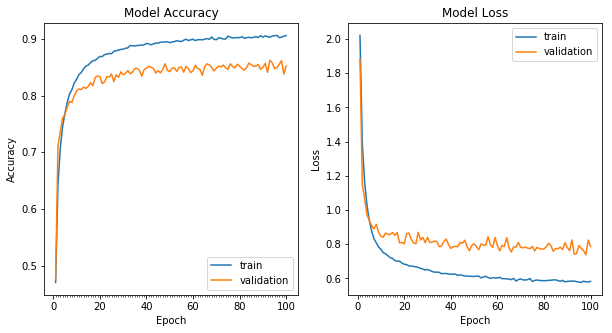

10000/10000 [==============================] - 2s 155us/step

Test result: 85.220 loss: 0.788


In [32]:
# plot model accuracy and model loss
plot_model_history(fit_history)

acc = model.evaluate(images_test, labels_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))

### 3-1 Modeling: Add Data Augmentation (Not Enough Time)

In [36]:
# datagen = ImageDataGenerator(zoom_range=0.2,
#                              rotation_range=15,
#                              horizontal_flip=True)

# # train the model
# start = time.time()

# fit_history_augmented = model.fit_generator(datagen.flow(images_train, labels_train, batch_size=128),
#                     steps_per_epoch=images_train.shape[0], 
#                     epochs=25, verbose=1,
#                     validation_data=(images_test,labels_test))

# end = time.time()

# # Training time
# print("Model took %0.2f seconds to train"%(end - start))

Epoch 1/25
50000/50000 [==============================] - 2514s 50ms/step - loss: 0.7335 - acc: 0.8320 - val_loss: 0.6388 - val_acc: 0.8674
Epoch 2/25
50000/50000 [==============================] - 2502s 50ms/step - loss: 0.7226 - acc: 0.8352 - val_loss: 0.6378 - val_acc: 0.8676
Epoch 3/25
50000/50000 [==============================] - 2500s 50ms/step - loss: 0.7177 - acc: 0.8365 - val_loss: 0.6515 - val_acc: 0.8614
Epoch 4/25
50000/50000 [==============================] - 2503s 50ms/step - loss: 0.7128 - acc: 0.8371 - val_loss: 0.6158 - val_acc: 0.8728
Epoch 5/25
50000/50000 [==============================] - 2501s 50ms/step - loss: 0.7109 - acc: 0.8373 - val_loss: 0.6263 - val_acc: 0.8651
Epoch 6/25
50000/50000 [==============================] - 2503s 50ms/step - loss: 0.7086 - acc: 0.8377 - val_loss: 0.6213 - val_acc: 0.8707
Epoch 7/25
50000/50000 [==============================] - 2506s 50ms/step - loss: 0.7072 - acc: 0.8380 - val_loss: 0.6235 - val_acc: 0.8676
Epoch 8/25
50000/500

### 3-2 Evaluation

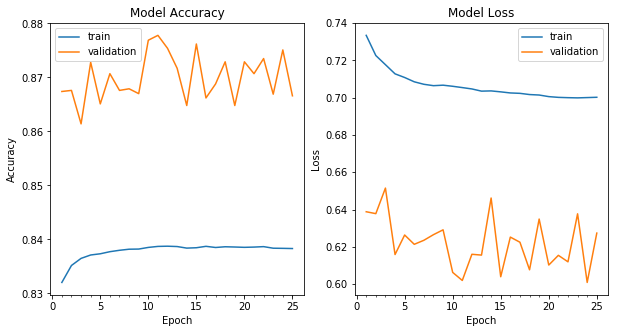

10000/10000 [==============================] - 1s 148us/step

Test result: 86.660 loss: 0.627


In [37]:
# # plot model accuracy and model loss
# plot_model_history(fit_history_augmented)

# acc = model.evaluate(images_test, labels_test, batch_size=128, verbose=1)
# print('\nTest result: %.3f loss: %.3f' % (acc[1]*100, acc[0]))